<h1 style="color:green" align="center"> Youtube Adview Prediction </h1>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h2> Step-1: Import the datasets and libraries,check space and datatype</h2>
</div>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt


In [4]:
#importing data
data_train=pd.read_csv("./train.csv")
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [5]:
data_train.shape

(14999, 9)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h2>Step-2: Visualise the dataset using heatmaps and plots</h2>
</div>


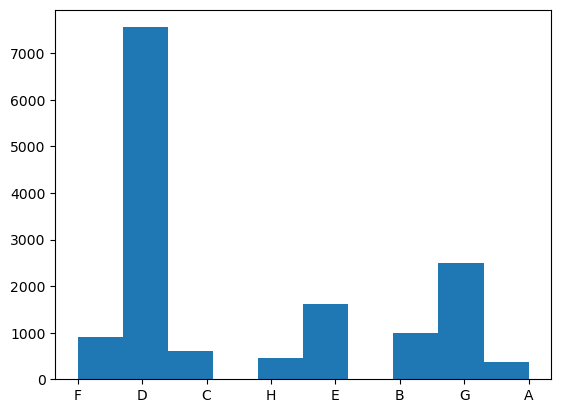

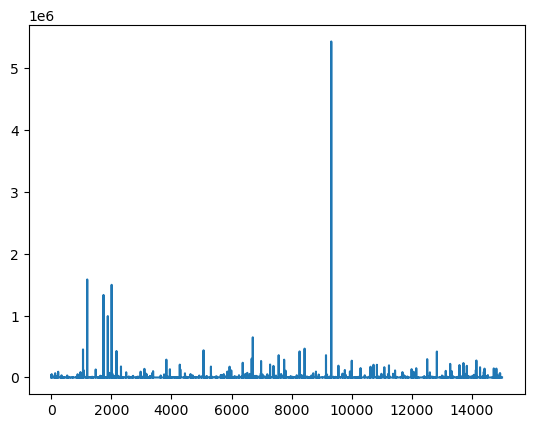

In [6]:
#visualization
#individual plots

plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()

In [7]:
#remove videos with adview greater than 2000000 as outlier
data_train=data_train[data_train["adview"]<2000000]
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D



<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h2>Step-3: Clean the dataset by removing missing values and other things.</h2>
</div>

In [9]:
# Removing character "F" present in train data
data_train=data_train[data_train.views != 'F']
data_train=data_train[data_train.likes != 'F']
data_train=data_train[data_train.dislikes != 'F']
data_train=data_train[data_train.comment != 'F']
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [10]:
# Assignment each category a number for category feature
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4



<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h2>Step-4: Transform attributes into numerical values and other necessary transformations</h2>
</div>

In [11]:
# convert values to integer for views, likes,comment, dislikes and adview
data_train["views"]=pd.to_numeric(data_train["views"])
data_train["comment"]=pd.to_numeric(data_train["comment"])
data_train["likes"]=pd.to_numeric(data_train["likes"])
data_train["dislikes"]=pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']
data_train

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,1
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,4
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,2
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,7


In [12]:
# Encoding features like category,Duration,vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])

data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [13]:
# Convert time_in_sec for duration
import datetime
import time

In [14]:
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp
train=pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
    h, m, s = time_string.split(":")
    return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


In [15]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


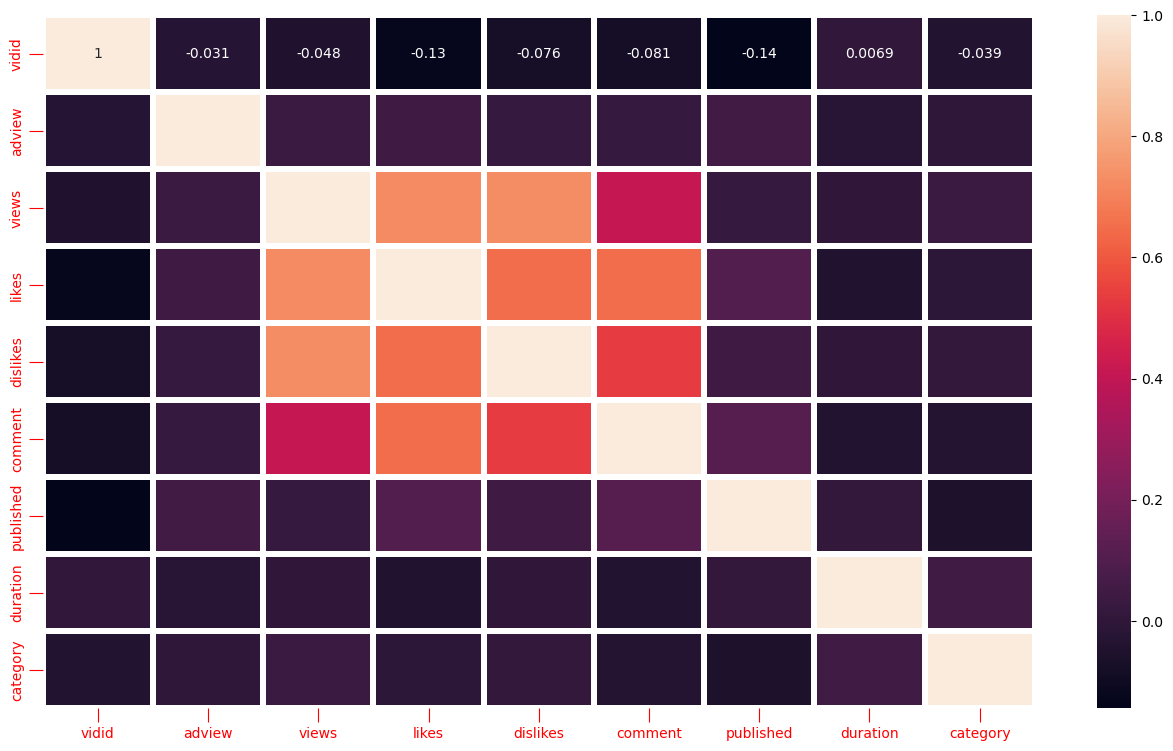

In [16]:
import seaborn as sns
plt.figure(figsize=(16,9))
ax=sns.heatmap(data_train.corr(),annot=True,linewidth=3) 
ax.tick_params(size=10,color='r',labelsize=10,labelcolor='r')
plt.show()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h2>Step-5: Normalise your data and split the data into training,validation and test set</h2>
</div>

In [17]:
# Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()


,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape

(11708, 7)

In [19]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.1739096800320488

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h2>Step-6: Use linear regression ,support vector regressor,random forest and for training and get errors</h2>
</div>

In [20]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
    
    

In [21]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3707.3780058245347
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [22]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

C:\Users\boddu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3707.3780058245347
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h2>Step-7: Use Decision Tree Regressor and random forest regressors</h2>
</div>

In [23]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)


Mean Absolute Error: 2716.4911202185795
Mean Squared Error: 895888384.8155738
Root Mean Squared Error: 29931.394635325196


In [24]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

C:\Users\boddu\AppData\Local\Temp\ipykernel_9356\3179977126.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean Absolute Error: 3311.3379305306316
Mean Squared Error: 568353072.3927722
Root Mean Squared Error: 23840.15671913195


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h2>Step-8: Build an artificil neural network and train it with different layers and hyperparameters</h2>
</div>

In [25]:
# Artificial Neural Network
#!pip install keras
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
                                Dense(6, activation="relu",
                                input_shape=X_train.shape[1:]),
                                Dense(6,activation="relu"),
                                Dense(1)
                                ])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100


C:\Users\boddu\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 877us/step - loss: 693891072.0000 - mean_squared_error: 693891072.0000
Epoch 2/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 525447264.0000 - mean_squared_error: 525447264.0000
Epoch 3/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 396034304.0000 - mean_squared_error: 396034304.0000
Epoch 4/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 608069568.0000 - mean_squared_error: 608069568.0000
Epoch 5/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 1232861056.0000 - mean_squared_error: 1232861056.0000
Epoch 6/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 346275584.0000 - mean_squared_error: 346275584.0000
Epoch 7/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 1092137600.0000 - mean_squared_error: 1092137600.0000
Epoch 8/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 1177570560.0000 - mean_squared_error: 1177570560.0000
Epoch 9/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 548772480.0000 - mean_s

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 293 (1.15 KB)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 196 (788.00 B)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error: 3133.2537244629175
Mean Squared Error: 828743396.0516578
Root Mean Squared Error: 28787.90364114167


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h2> Step-9: Save the model and predict on test set</h2>
</div>

In [42]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "ytmodel.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ytmodel.h5")

In [27]:
data_test=pd.read_csv("test.csv")
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [28]:
# Removing character "F" present in test data
data_test=data_test[data_test.views != 'F']
data_test=data_test[data_test.likes != 'F']
data_test=data_test[data_test.dislikes != 'F']
data_test=data_test[data_test.comment != 'F']
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [29]:
# Assignment each category a number for category feature
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]=data_test["category"].map(category)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [30]:
# convert values to integer for views, likes,comment, dislikes and adview
data_test["views"]=pd.to_numeric(data_test["views"])
data_test["comment"]=pd.to_numeric(data_test["comment"])
data_test["likes"]=pd.to_numeric(data_test["likes"])
data_test["dislikes"]=pd.to_numeric(data_test["dislikes"])
column_vidid=data_test['vidid']

In [31]:
# Encoding features like category,Duration,vidid
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])

data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [32]:
# Convert time_in_sec for duration
import datetime
import time

In [33]:
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp
train=pd.read_csv("test.csv")
mp = pd.read_csv("test.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
    h, m, s = time_string.split(":")
    return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
data_test["duration"]=time1
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [34]:
# Drop the column "vidid" as is has no effect to target variable
data_test=data_test.drop(["vidid"],axis=1)

In [35]:
# Dataset
data_test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h2> Step-10: prediction on test set</h2>
</div>

In [36]:
#Predict your model using test dataset
pred_y = random_forest.predict(data_test)

C:\Users\boddu\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [37]:
pred_y

array([134149.47310314, 134149.47310314, 134149.47310314, ...,
       134149.47310314, 134149.47310314, 172992.03070939])

In [38]:
# Change the datatype of "adview" from float to int
final_data_test=data_test
final_data_test["adview"]=pred_y
final_data_test["adview"]=final_data_test["adview"].astype(int)

In [39]:
final_data_test.head()

,views,likes,dislikes,comment,published,duration,category,adview
0,440238,6153,218,1377,2053,449,2,134149
1,1040132,8171,340,1047,1825,389,6,134149
2,28534,31,11,1,1009,2274,4,134149
3,1316715,2284,250,274,116,595,7,134149
4,1893173,2519,225,116,1892,188,2,134149


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h2> Step-11:Save the model in csv file </h2>
</div>

In [43]:
# save the model in .csv file named as "Predictions_Submission"
final_data_test.to_csv("Predictions_Submission")